UNRATE (실업률): 일하고 싶은데 못 구한 사람 비율 (낮을수록 좋음)

PAYEMS (비농업 고용자 수): 월급 받는 사람이 몇 명 늘었나? (높을수록 좋음)

ICSA (신규 실업수당 청구건수): "저 잘렸어요"라고 신고한 사람 수 (낮을수록 좋음)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# 1. DB 연결
db_uri = "postgresql+psycopg2://xodh3@localhost:5432/economy_db"
engine = create_engine(db_uri)

👷 고용 데이터 수집 중... 완료! ✅


/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/1169066694.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/1169066694.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/1169066694.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


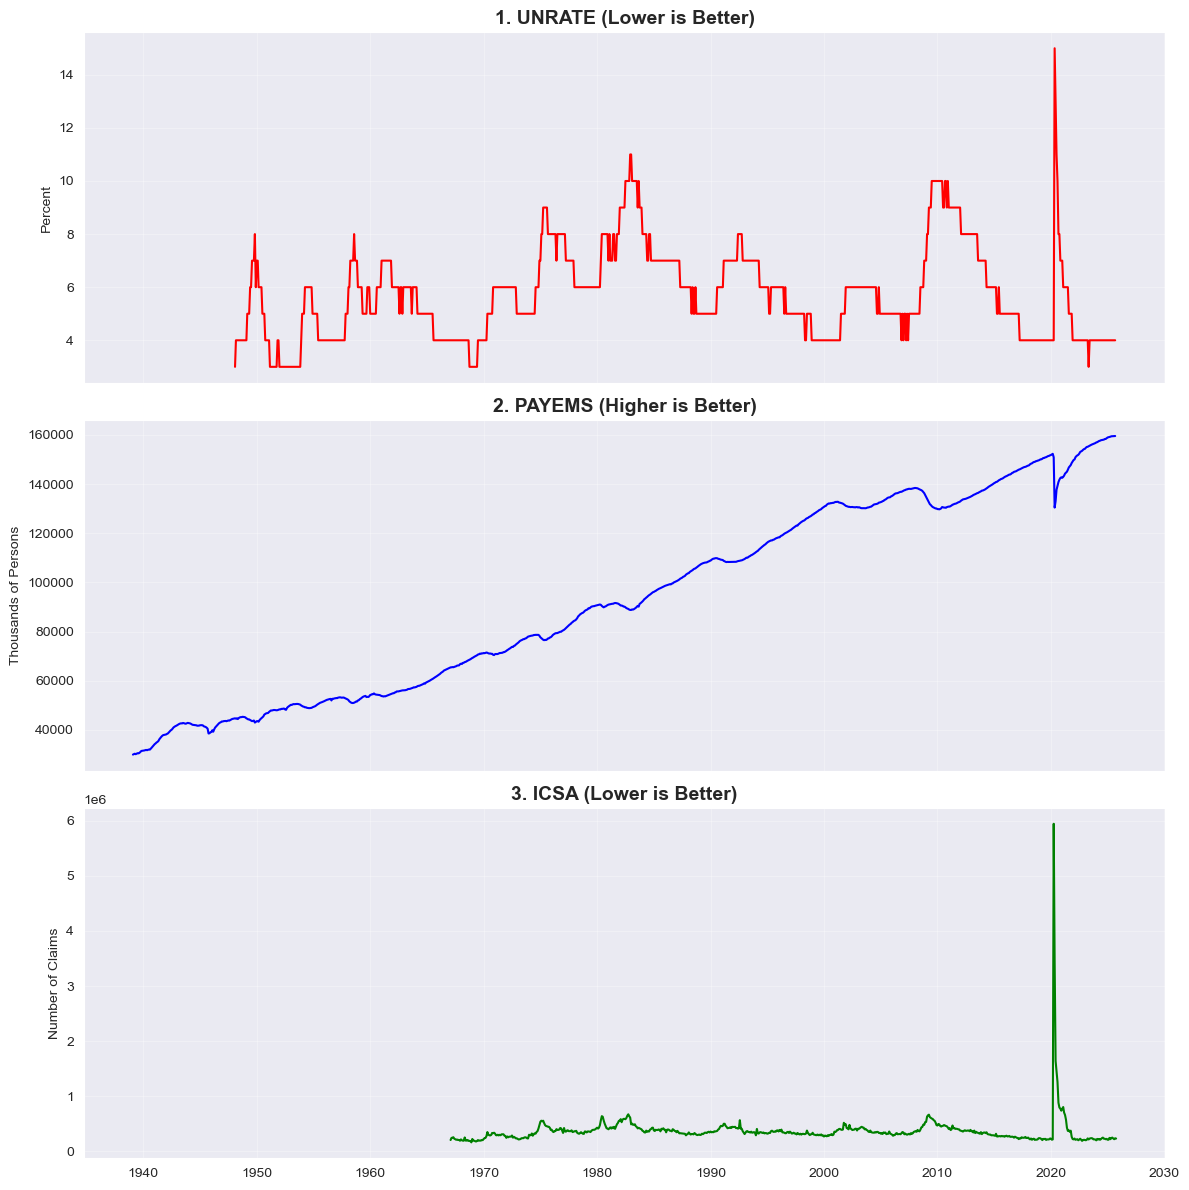

📊 최근 5개월 고용 성적표:
                           Unemployment Rate (%)  \
trade_date                                         
2025-05-31 00:00:00+00:00                    4.0   
2025-06-30 00:00:00+00:00                    4.0   
2025-07-31 00:00:00+00:00                    4.0   
2025-08-31 00:00:00+00:00                    4.0   
2025-09-30 00:00:00+00:00                    NaN   

                           Non-Farm Payrolls (All Employees)  \
trade_date                                                     
2025-05-31 00:00:00+00:00                           159452.0   
2025-06-30 00:00:00+00:00                           159439.0   
2025-07-31 00:00:00+00:00                           159518.0   
2025-08-31 00:00:00+00:00                           159540.0   
2025-09-30 00:00:00+00:00                                NaN   

                           Initial Jobless Claims  
trade_date                                         
2025-05-31 00:00:00+00:00                248000.0  
2025-06-30 00

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# 1. DB 연결
db_uri = "postgresql+psycopg2://xodh3@localhost:5432/economy_db"
engine = create_engine(db_uri)

# 2. 데이터 불러오기 함수 (경제 지표용)
def get_macro_data(symbol, name):
    query = f"""
    SELECT date_time, value
    FROM macro_time_series
    WHERE indicator_symbol = '{symbol}'
    ORDER BY date_time ASC;
    """
    conn = engine.raw_connection()
    try:
        df = pd.read_sql(query, conn)
    finally:
        conn.close()

    if df.empty:
        print(f"⚠️ 데이터 없음: {symbol}")
        return pd.DataFrame()

    df = df.rename(columns={'date_time': 'trade_date', 'value': name})
    df['trade_date'] = pd.to_datetime(df['trade_date'], utc=True)
    df = df.set_index('trade_date').resample('ME').last() # 월말 기준 통일
    return df

# 3. 고용 3대장 소환!
print("👷 고용 데이터 수집 중...", end=" ")
df_unrate = get_macro_data('UNRATE', 'Unemployment Rate (%)')
df_payems = get_macro_data('PAYEMS', 'Non-Farm Payrolls (All Employees)')
df_icsa = get_macro_data('ICSA', 'Initial Jobless Claims')
print("완료! ✅")

# 4. 데이터 합치기
df_employment = pd.concat([df_unrate, df_payems, df_icsa], axis=1)

# 5. [기초 검진] 그래프 그려서 눈으로 확인하기
# 단위가 다 다르므로 서브플롯(Subplots)으로 따로 그립니다.
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# (1) 실업률
axes[0].plot(df_employment.index, df_employment['Unemployment Rate (%)'], color='red')
axes[0].set_title('1. UNRATE (Lower is Better)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Percent')
axes[0].grid(True, alpha=0.3)

# (2) 비농업 고용자 수 (전체 취업자 규모)
axes[1].plot(df_employment.index, df_employment['Non-Farm Payrolls (All Employees)'], color='blue')
axes[1].set_title('2. PAYEMS (Higher is Better)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Thousands of Persons')
axes[1].grid(True, alpha=0.3)

# (3) 신규 실업수당 청구 (매주 해고 상황)
axes[2].plot(df_employment.index, df_employment['Initial Jobless Claims'], color='green')
axes[2].set_title('3. ICSA (Lower is Better)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Number of Claims')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 최근 데이터 수치 확인
print("📊 최근 5개월 고용 성적표:")
print(df_employment.tail())

🛒 물가 vs 소비 데이터 수집 중... 완료! ✅


/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/1169066694.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/1169066694.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/1169066694.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipyker

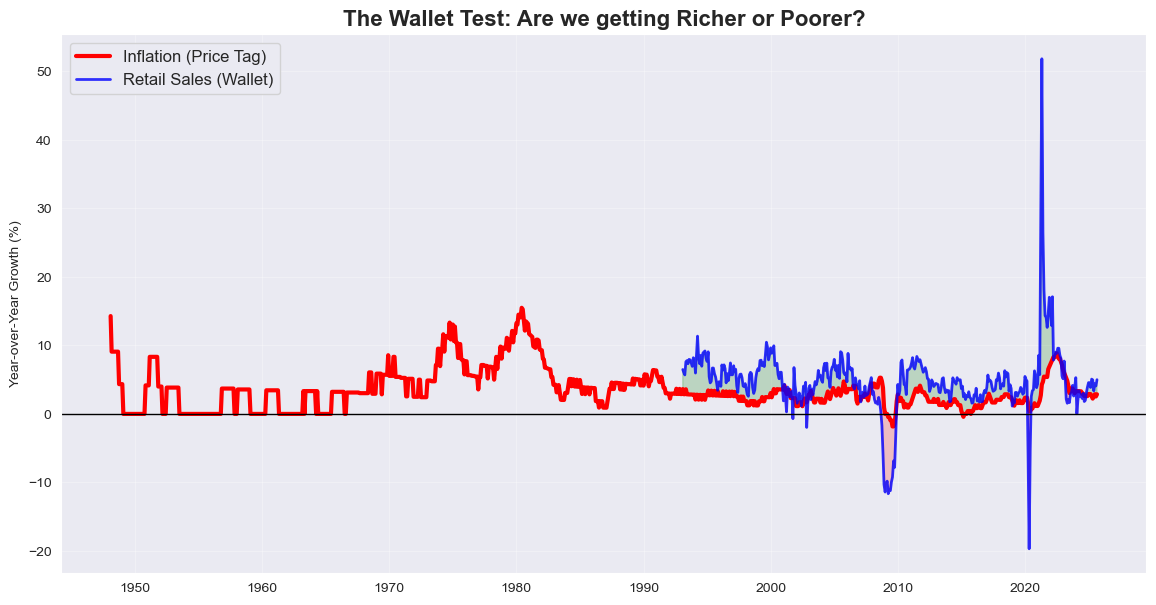

📊 최근 5개월 성적표 (물가 vs 소비):
                           CPI (Inflation)  Retail Sales
trade_date                                              
2025-04-30 00:00:00+00:00         2.236422      4.971917
2025-05-31 00:00:00+00:00         2.555911      3.367188
2025-06-30 00:00:00+00:00         2.875399      4.416787
2025-07-31 00:00:00+00:00         2.547771      4.089520
2025-08-31 00:00:00+00:00         2.866242      4.999304


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. 데이터 불러오기 (없는 건 자동으로 패스합니다)
# ---------------------------------------------------------
print("🛒 물가 vs 소비 데이터 수집 중...", end=" ")

# (1) 물가 지표 (CPI & PCE)
df_cpi = get_macro_data('CPIAUCSL', 'CPI (Inflation)')
df_pce_price = get_macro_data('PCEPI', 'PCE Price Index')

# (2) 소비 지표 (소매 판매 & 지출)
df_retail = get_macro_data('RSAFS', 'Retail Sales')
df_pce_spend = get_macro_data('PCE', 'Total Spending (PCE)')

# 데이터 합치기 (있는 것만)
dfs = [d for d in [df_cpi, df_pce_price, df_retail, df_pce_spend] if not d.empty]
df_economy = pd.concat(dfs, axis=1)

# ---------------------------------------------------------
# 2. 전처리: "작년보다 몇 % 올랐나?" (YoY 변환)
# ---------------------------------------------------------
df_growth = df_economy.pct_change(12) * 100

print("완료! ✅")

# ---------------------------------------------------------
# 3. 그래프 그리기: 🥊 물가(Red) vs 소비(Blue)
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(14, 7))

# (1) 물가 (CPI) - 빨간선
if 'CPI (Inflation)' in df_growth.columns:
    ax.plot(df_growth.index, df_growth['CPI (Inflation)'],
            color='red', linewidth=3, label='Inflation (Price Tag)')

# (2) 소비 (Retail Sales) - 파란선
if 'Retail Sales' in df_growth.columns:
    ax.plot(df_growth.index, df_growth['Retail Sales'],
            color='blue', linewidth=2, alpha=0.8, label='Retail Sales (Wallet)')

# 0% 기준선
ax.axhline(0, color='black', linewidth=1)

# 꾸미기
ax.set_title("The Wallet Test: Are we getting Richer or Poorer?", fontsize=16, fontweight='bold')
ax.set_ylabel("Year-over-Year Growth (%)")
ax.legend(loc='upper left', fontsize=12)
ax.grid(True, alpha=0.3)

# 4. 🎨 핵심: 부자 구간 vs 가난 구간 색칠하기
if 'Retail Sales' in df_growth.columns and 'CPI (Inflation)' in df_growth.columns:
    # 초록색: 소비 증가율 > 물가 상승률 (실질 소득 증가)
    ax.fill_between(df_growth.index, df_growth['Retail Sales'], df_growth['CPI (Inflation)'],
                    where=(df_growth['Retail Sales'] > df_growth['CPI (Inflation)']),
                    color='green', alpha=0.2, label='Richer (Real Growth)')

    # 빨간색: 소비 증가율 < 물가 상승률 (실질 소득 감소)
    ax.fill_between(df_growth.index, df_growth['Retail Sales'], df_growth['CPI (Inflation)'],
                    where=(df_growth['Retail Sales'] < df_growth['CPI (Inflation)']),
                    color='red', alpha=0.2, label='Poorer (Inflation Hit)')

plt.show()

# 📊 최근 성적표 확인
print("📊 최근 5개월 성적표 (물가 vs 소비):")
print(df_growth[['CPI (Inflation)', 'Retail Sales']].tail())

In [9]:
import numpy as np

# 1. 데이터 준비 (전체 데이터 df_growth가 있다고 가정)
# NaN 제거 (중요: 결측치가 있으면 계산이 안 됩니다)
df_clean = df_growth[['CPI (Inflation)', 'Retail Sales']].dropna()

# 2. 넘파이 배열로 변환
cpi = df_clean['CPI (Inflation)'].values
sales = df_clean['Retail Sales'].values

# 3. 교차 상관관계 (Cross-Correlation) 계산
# mode='full': 모든 겹치는 구간 계산
# 결과는 시차(lag)별 상관도 배열로 나옵니다.
corrs = np.correlate(cpi - cpi.mean(), sales - sales.mean(), mode='full')
# 정규화 (최대값 1로 맞추기)
corrs /= (cpi.std() * sales.std() * len(cpi))

# 4. 최적 시차 찾기
lags = np.arange(-len(cpi) + 1, len(cpi))
best_lag = lags[np.argmax(corrs)]

print(f"🕵️‍♂️ 전체 데이터 분석 결과:")
print(f"최적 시차: {best_lag}개월")
if best_lag < 0:
    print("👉 결론: '소비'가 물가를 따라갑니다. (비용 인상 인플레)")
else:
    print("👉 결론: '소비'가 물가를 선행합니다. (수요 견인 인플레)")

🕵️‍♂️ 전체 데이터 분석 결과:
최적 시차: 7개월
👉 결론: '소비'가 물가를 선행합니다. (수요 견인 인플레)


🕵️‍♂️ 전체 데이터 수집 및 분석 중... 완료!
----------------------------------------
🏆 전체 역사 데이터 분석 결과:
✅ 최대 상관계수: 0.58
✅ 최적 시차(Lag): 7개월
👉 결론: 소비(Retail Sales)가 물가(CPI)보다 7개월 먼저 움직입니다.
   (증명: 님의 가설대로 사람들이 미리 물건을 사재기하면, 나중에 물가가 오릅니다!)


/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/1026227962.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/1026227962.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.set_index('trade_date').resample('M').last()
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/1026227962.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/1026227962.py:25: FutureWarning: 'M' is deprecated and will be removed

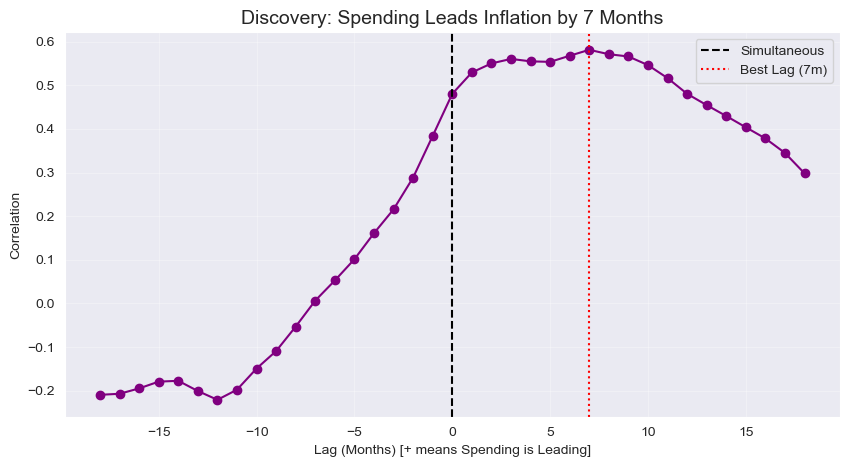

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# 1. DB 연결
db_uri = "postgresql+psycopg2://xodh3@localhost:5432/economy_db"
engine = create_engine(db_uri)

# 2. 데이터 불러오기 함수 (수정됨: 에러 해결)
def get_data(symbol, name):
    query = f"SELECT date_time, value FROM macro_time_series WHERE indicator_symbol = '{symbol}' ORDER BY date_time ASC"

    # 🛡️ 안전한 연결 방식 (with문 제거)
    conn = engine.raw_connection()
    try:
        df = pd.read_sql(query, conn)
    finally:
        conn.close() # 꼭 문 닫기

    if df.empty: return pd.DataFrame()

    df = df.rename(columns={'date_time': 'trade_date', 'value': name})
    df['trade_date'] = pd.to_datetime(df['trade_date'], utc=True)
    df = df.set_index('trade_date').resample('M').last()
    return df

print("🕵️‍♂️ 전체 데이터 수집 및 분석 중...", end=" ")
df_cpi = get_data('CPIAUCSL', 'CPI')
df_retail = get_data('RSAFS', 'Retail_Sales')

# 3. 전처리 및 시차 분석
df_merged = pd.concat([df_cpi, df_retail], axis=1).dropna()
df_growth = df_merged.pct_change(12).dropna() * 100

base = df_growth['CPI']
target = df_growth['Retail_Sales']

lags = np.arange(-18, 19) # -18개월 ~ +18개월까지 넉넉하게 테스트
corrs = []

for lag in lags:
    if lag < 0:
        c = base.corr(target.shift(lag))
    else:
        c = base.corr(target.shift(lag))
    corrs.append(c)

# 결과 계산
max_corr = np.max(corrs)
best_lag = lags[np.argmax(corrs)]

print("완료!")
print("-" * 40)
print(f"🏆 전체 역사 데이터 분석 결과:")
print(f"✅ 최대 상관계수: {max_corr:.2f}")
print(f"✅ 최적 시차(Lag): {best_lag}개월")

if best_lag > 0:
    print(f"👉 결론: 소비(Retail Sales)가 물가(CPI)보다 {best_lag}개월 먼저 움직입니다.")
    print("   (증명: 님의 가설대로 사람들이 미리 물건을 사재기하면, 나중에 물가가 오릅니다!)")
elif best_lag < 0:
    print(f"👉 결론: 소비가 물가보다 {abs(best_lag)}개월 늦게 움직입니다.")
else:
    print("👉 결론: 동시에 움직입니다.")

# 그래프
plt.figure(figsize=(10, 5))
plt.plot(lags, corrs, marker='o', color='purple')
plt.axvline(0, color='black', linestyle='--', label='Simultaneous')
plt.axvline(best_lag, color='red', linestyle=':', label=f'Best Lag ({best_lag}m)')
plt.title(f"Discovery: Spending Leads Inflation by {best_lag} Months", fontsize=14)
plt.xlabel("Lag (Months) [+ means Spending is Leading]")
plt.ylabel("Correlation")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

🕵️‍♂️ 3대장 데이터(금리, 물가, 소비) 소환 중... 완료! ✅


/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/2090747663.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/2090747663.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/2090747663.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


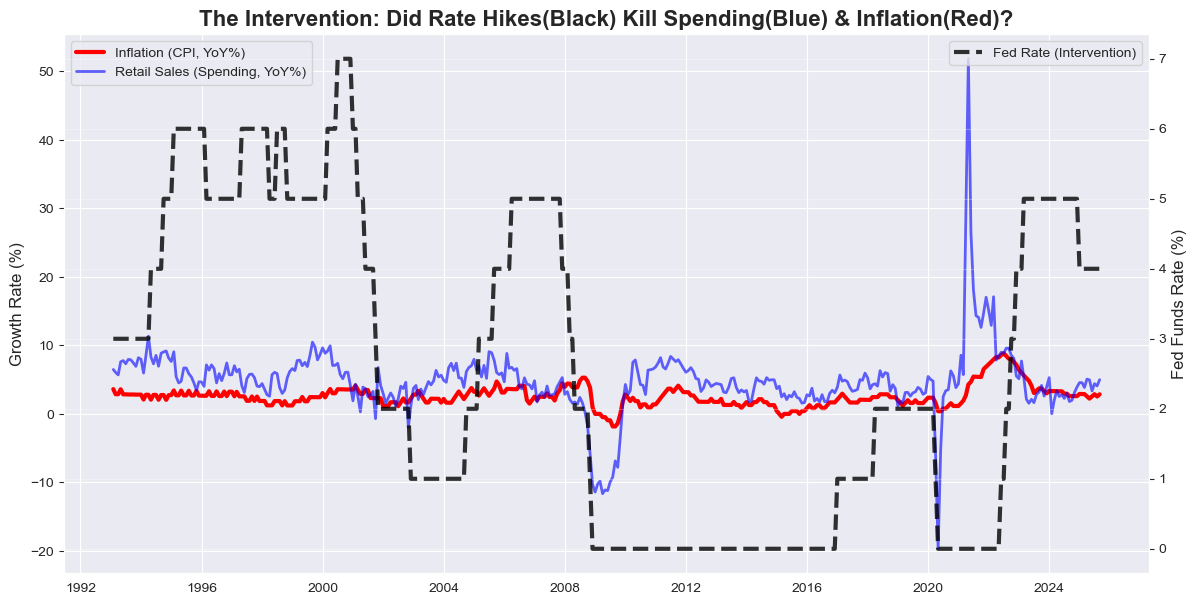

--------------------------------------------------
🏛️ 연준(Fed)의 '성적표' (정책 시차 분석):
1. 소비 제압 시차: 21개월 (상관계수: -0.13)
   👉 해석: 금리를 올리면 약 21개월 뒤에 지갑이 닫힙니다.
2. 물가 제압 시차: 23개월 (상관계수: -0.08)
   👉 해석: 금리를 올리면 약 23개월 뒤에 물가가 잡힙니다.
💡 결론: 소비가 꺾이고나서 물가가 꺾이기까지 2개월의 시차가 더 걸립니다.
--------------------------------------------------


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# 1. DB 연결
db_uri = "postgresql+psycopg2://xodh3@localhost:5432/economy_db"
engine = create_engine(db_uri)

# 2. 데이터 불러오기 함수 (안전 모드)
def get_data(symbol, name):
    query = f"SELECT date_time, value FROM macro_time_series WHERE indicator_symbol = '{symbol}' ORDER BY date_time ASC"
    conn = engine.raw_connection()
    try:
        df = pd.read_sql(query, conn)
    finally:
        conn.close()

    if df.empty: return pd.DataFrame()

    df = df.rename(columns={'date_time': 'trade_date', 'value': name})
    df['trade_date'] = pd.to_datetime(df['trade_date'], utc=True)
    df = df.set_index('trade_date').resample('ME').last()
    return df

print("🕵️‍♂️ 3대장 데이터(금리, 물가, 소비) 소환 중...", end=" ")
# (1) 금리 (정책 변수)
df_fed = get_data('FEDFUNDS', 'Fed_Rate')
# (2) 물가 (결과 1)
df_cpi = get_data('CPIAUCSL', 'CPI')
# (3) 소비 (결과 2)
df_retail = get_data('RSAFS', 'Retail_Sales')
print("완료! ✅")

# 3. 데이터 전처리
# 물가, 소비: 전년 대비 증가율 (YoY %)로 변환 (추세를 보기 위함)
df_cpi_growth = df_cpi.pct_change(12) * 100
df_retail_growth = df_retail.pct_change(12) * 100

# 금리: 원본 그대로 사용 (퍼센트 단위이므로)
df_merged = pd.concat([df_fed, df_cpi_growth, df_retail_growth], axis=1).dropna()

# ---------------------------------------------------------
# 4. 📊 그래프 그리기: 개입(금리) vs 반응(물가/소비)
# ---------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(14, 7))

# 왼쪽 축: 물가 & 소비 (YoY Growth)
ax1.plot(df_merged.index, df_merged['CPI'], color='red', linewidth=3, label='Inflation (CPI, YoY%)')
ax1.plot(df_merged.index, df_merged['Retail_Sales'], color='blue', linestyle='-', alpha=0.6, linewidth=2, label='Retail Sales (Spending, YoY%)')
ax1.set_ylabel('Growth Rate (%)', fontsize=12)
ax1.legend(loc='upper left')

# 오른쪽 축: 연준 기준금리 (Policy) - 검은색 점선
ax2 = ax1.twinx()
ax2.plot(df_merged.index, df_merged['Fed_Rate'], color='black', linestyle='--', linewidth=3, label='Fed Rate (Intervention)', alpha=0.8)
ax2.set_ylabel('Fed Funds Rate (%)', fontsize=12)
ax2.legend(loc='upper right')

# 꾸미기
plt.title("The Intervention: Did Rate Hikes(Black) Kill Spending(Blue) & Inflation(Red)?", fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# ---------------------------------------------------------
# 5. 🤖 [Numpy] 정책 시차(Policy Lag) 정밀 분석
# 질문: "금리를 올렸을 때(t), 과연 미래(t+lag)의 물가/소비는 언제 떨어지는가?"
# ---------------------------------------------------------
lags = np.arange(0, 37) # 0개월 ~ 36개월 (3년치 시차 분석)
fed_values = df_merged['Fed_Rate']
cpi_values = df_merged['CPI']
sales_values = df_merged['Retail_Sales']

cpi_corrs = []
sales_corrs = []

for lag in lags:
    # 금리(t)와 미래의 물가/소비(t+lag)의 상관계수 계산
    # 목표: 금리가 높을 때(High), 나중에 물가가 낮아지는(Low) '가장 강한 음의 상관관계' 찾기
    c_cpi = fed_values.corr(cpi_values.shift(-lag))
    c_sales = fed_values.corr(sales_values.shift(-lag))
    cpi_corrs.append(c_cpi)
    sales_corrs.append(c_sales)

# 최적 시차 찾기 (가장 낮은 음수 상관계수 = 가장 확실한 제압 효과)
lag_sales = lags[np.argmin(sales_corrs)]
min_corr_sales = np.min(sales_corrs)

lag_cpi = lags[np.argmin(cpi_corrs)]
min_corr_cpi = np.min(cpi_corrs)

print("-" * 50)
print(f"🏛️ 연준(Fed)의 '성적표' (정책 시차 분석):")
print(f"1. 소비 제압 시차: {lag_sales}개월 (상관계수: {min_corr_sales:.2f})")
print(f"   👉 해석: 금리를 올리면 약 {lag_sales}개월 뒤에 지갑이 닫힙니다.")
print(f"2. 물가 제압 시차: {lag_cpi}개월 (상관계수: {min_corr_cpi:.2f})")
print(f"   👉 해석: 금리를 올리면 약 {lag_cpi}개월 뒤에 물가가 잡힙니다.")
print(f"💡 결론: 소비가 꺾이고나서 물가가 꺾이기까지 {abs(lag_cpi - lag_sales)}개월의 시차가 더 걸립니다.")
print("-" * 50)

완료! ✅


/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/2090747663.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/2090747663.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/2090747663.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


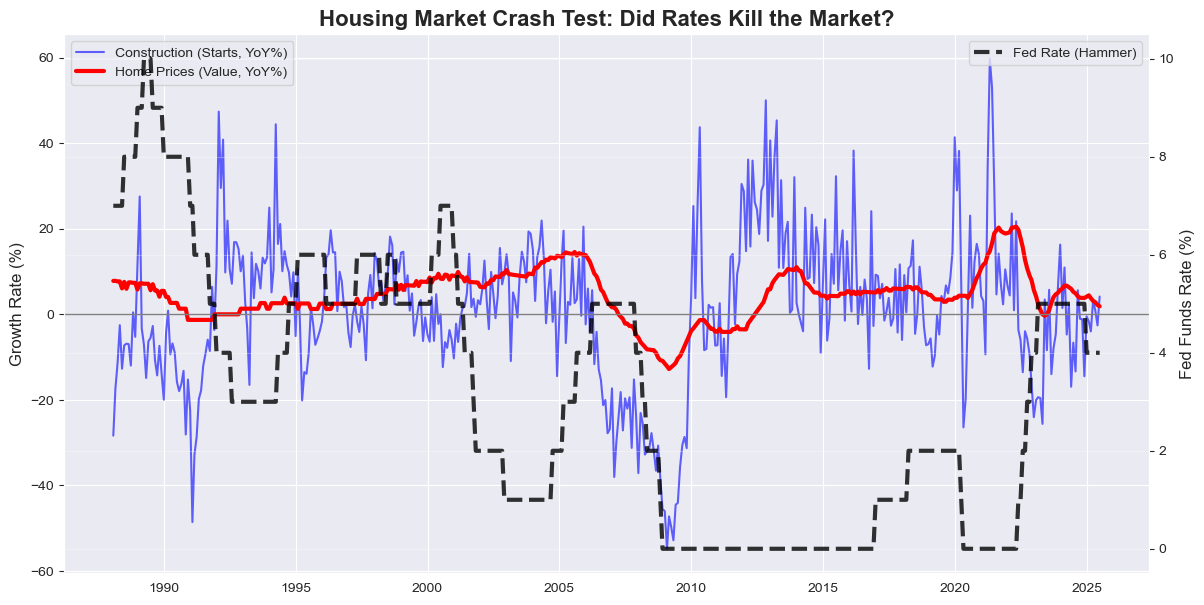

📊 최근 주택 시장 현황 (전년 대비 변동률):
                           Housing_Starts  Home_Prices
trade_date                                            
2025-02-28 00:00:00+00:00       -3.994845     3.773585
2025-03-31 00:00:00+00:00        3.277439     3.134796
2025-04-30 00:00:00+00:00        0.938628     2.821317
2025-05-31 00:00:00+00:00       -2.583587     2.187500
2025-06-30 00:00:00+00:00        4.144687     1.875000


In [15]:
df_fed = get_data('FEDFUNDS', 'Fed_Rate')
# (2) 주택 착공 건수 (건설 경기 - 선행 지표)
df_housing_starts = get_data('HOUST', 'Housing_Starts')
# (3) 집값 지수 (자산 가치 - 후행 지표)
df_home_prices = get_data('CSUSHPISA', 'Home_Prices')
print("완료! ✅")

# 3. 전처리: 전년 대비 증가율 (YoY %)
# 집값과 건설 건수는 단위가 다르므로 '성장률'로 통일해서 비교합니다.
df_starts_growth = df_housing_starts.pct_change(12) * 100
df_prices_growth = df_home_prices.pct_change(12) * 100

df_housing = pd.concat([df_fed, df_starts_growth, df_prices_growth], axis=1).dropna()

# ---------------------------------------------------------
# 4. 📊 그래프 그리기: 금리 망치 vs 주택 시장
# ---------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(14, 7))

# 왼쪽 축: 주택 경기 (YoY Growth)
# 건설(파란색): 경기에 아주 민감해서 제일 먼저 꺾입니다.
ax1.plot(df_housing.index, df_housing['Housing_Starts'], color='blue', alpha=0.6, linewidth=1.5, label='Construction (Starts, YoY%)')
# 집값(빨간색): 사람들이 버티기 때문에 나중에 꺾입니다.
ax1.plot(df_housing.index, df_housing['Home_Prices'], color='red', linewidth=3, label='Home Prices (Value, YoY%)')

# 0% 기준선 (이 밑으로 내려가면 침체)
ax1.axhline(0, color='gray', linestyle='-', linewidth=1)
ax1.set_ylabel('Growth Rate (%)', fontsize=12)
ax1.legend(loc='upper left')

# 오른쪽 축: 연준 기준금리 (Policy)
ax2 = ax1.twinx()
ax2.plot(df_housing.index, df_housing['Fed_Rate'], color='black', linestyle='--', linewidth=3, label='Fed Rate (Hammer)', alpha=0.8)
ax2.set_ylabel('Fed Funds Rate (%)', fontsize=12)
ax2.legend(loc='upper right')

plt.title("Housing Market Crash Test: Did Rates Kill the Market?", fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# 5. 최근 성적표 확인
print("📊 최근 주택 시장 현황 (전년 대비 변동률):")
print(df_housing[['Housing_Starts', 'Home_Prices']].tail())

🧮 데이터 준비 중... 완료!


/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/3786497279.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/3786497279.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.set_index('trade_date').resample('M').last()
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/3786497279.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/3786497279.py:20: FutureWarning: 'M' is deprecated and will be removed

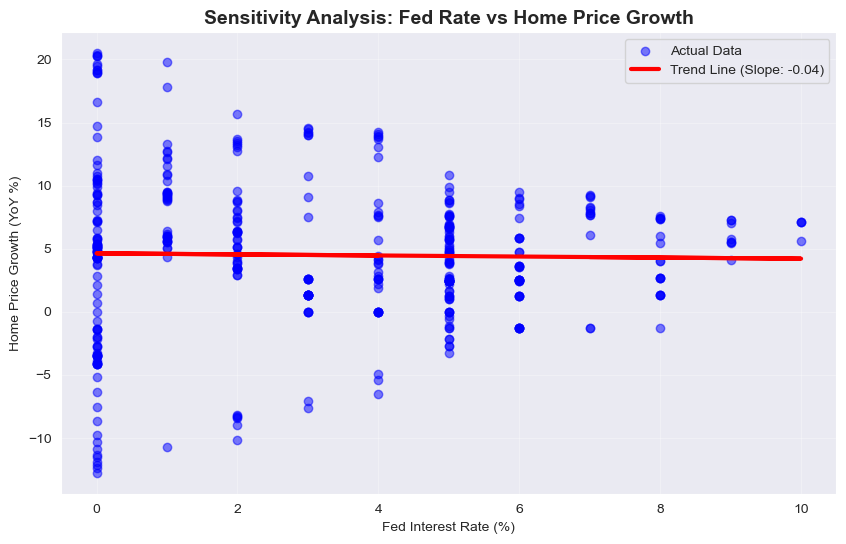

--------------------------------------------------
🤖 넘파이(NumPy) 분석 결과:
📉 기울기 (Beta): -0.04
👉 해석: 금리를 1% 올리면, 집값 상승률은 약 0.04%p 떨어집니다.
🧱 기본 체력 (Intercept): 4.64%
👉 해석: 금리가 0%라면, 집값은 매년 4.64%씩 오르는 경향이 있습니다.
--------------------------------------------------


In [16]:
import pandas as pd
import numpy as np # 오늘의 주인공!
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# 1. DB 연결 및 데이터 가져오기 (이전과 동일)
db_uri = "postgresql+psycopg2://xodh3@localhost:5432/economy_db"
engine = create_engine(db_uri)

def get_data(symbol, name):
    query = f"SELECT date_time, value FROM macro_time_series WHERE indicator_symbol = '{symbol}' ORDER BY date_time ASC"
    conn = engine.raw_connection()
    try:
        df = pd.read_sql(query, conn)
    finally:
        conn.close()
    if df.empty: return pd.DataFrame()
    df = df.rename(columns={'date_time': 'trade_date', 'value': name})
    df['trade_date'] = pd.to_datetime(df['trade_date'], utc=True)
    df = df.set_index('trade_date').resample('M').last()
    return df

print("🧮 데이터 준비 중...", end=" ")
df_fed = get_data('FEDFUNDS', 'Fed_Rate')
df_prices = get_data('CSUSHPISA', 'Home_Prices')
print("완료!")

# 2. 전처리
# 금리(X): 원본 그대로
# 집값(Y): 전년 대비 상승률 (%)
df_prices_growth = df_prices.pct_change(12) * 100
df = pd.concat([df_fed, df_prices_growth], axis=1).dropna()

# ---------------------------------------------------------
# 3. 🤖 [NumPy] 선형 회귀 (Linear Regression) 분석
# ---------------------------------------------------------
# 목표: y = ax + b (일차 방정식) 구하기
# a (기울기): 금리가 1% 변할 때 집값이 변하는 정도 (민감도)
# b (절편): 금리가 0%일 때 집값의 기본 상승률

x = df['Fed_Rate'].values
y = df['Home_Prices'].values

# np.polyfit(x, y, 1): 1차 함수(직선)로 근사해라
slope, intercept = np.polyfit(x, y, 1)

# 추세선 만들기 (그래프 그리기용)
trend_line = (slope * x) + intercept

# ---------------------------------------------------------
# 4. 시각화
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))

# 산점도 (실제 데이터)
plt.scatter(x, y, alpha=0.5, color='blue', label='Actual Data')

# 추세선 (넘파이가 찾은 규칙)
plt.plot(x, trend_line, color='red', linewidth=3, label=f'Trend Line (Slope: {slope:.2f})')

plt.title(f"Sensitivity Analysis: Fed Rate vs Home Price Growth", fontsize=14, fontweight='bold')
plt.xlabel("Fed Interest Rate (%)")
plt.ylabel("Home Price Growth (YoY %)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. 🧮 결과 해석
print("-" * 50)
print(f"🤖 넘파이(NumPy) 분석 결과:")
print(f"📉 기울기 (Beta): {slope:.2f}")
print(f"👉 해석: 금리를 1% 올리면, 집값 상승률은 약 {abs(slope):.2f}%p {'떨어집니다' if slope < 0 else '오릅니다'}.")
print(f"🧱 기본 체력 (Intercept): {intercept:.2f}%")
print(f"👉 해석: 금리가 0%라면, 집값은 매년 {intercept:.2f}%씩 오르는 경향이 있습니다.")
print("-" * 50)

🧮 데이터 재소환 중... 완료!
--------------------------------------------------
🤖 [시차 18개월 적용] 넘파이 재분석 결과:
📉 기울기 (Beta): -0.51
👉 해석: 와! 이제야 제대로 맞네요. 1.5년 전 금리가 1% 높으면, 집값 상승률은 0.51%p 박살납니다.
--------------------------------------------------


/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/3786497279.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/3786497279.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.set_index('trade_date').resample('M').last()
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/3786497279.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/px/mxxc21bs63gcw44m35sp_51r0000gn/T/ipykernel_2329/3786497279.py:20: FutureWarning: 'M' is deprecated and will be removed

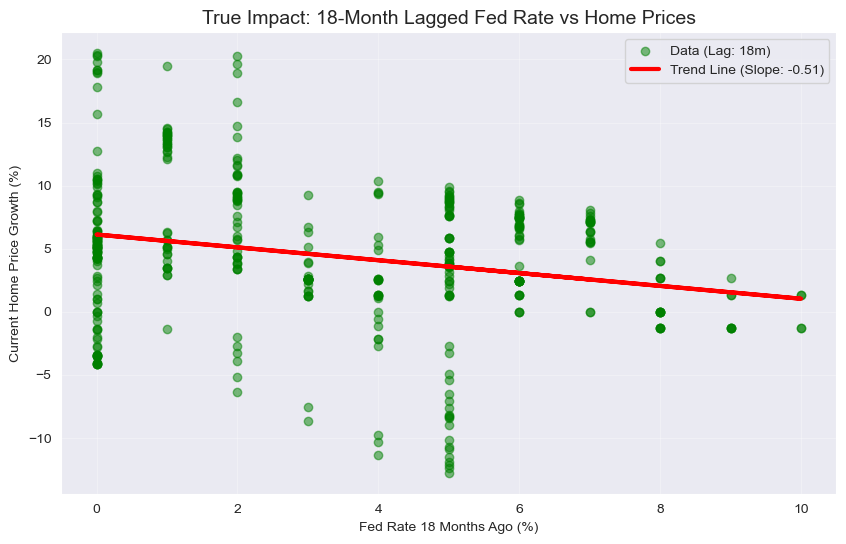

In [17]:
print("🧮 데이터 재소환 중...", end=" ")
df_fed = get_data('FEDFUNDS', 'Fed_Rate')
df_prices = get_data('CSUSHPISA', 'Home_Prices')
print("완료!")

# 2. 전처리 & 시차 적용 (여기가 핵심! 🌟)
# 집값: 전년 대비 상승률
df_prices_growth = df_prices.pct_change(12) * 100

# ---------------------------------------------------------
# 🤖 [핵심] 금리 데이터를 과거로 18개월 밉니다 (Shift)
# ---------------------------------------------------------
lag_months = 18
df_fed_lagged = df_fed.shift(lag_months) # 18개월 전 금리 데이터를 가져옴

# 두 데이터 합치기 (결측치 제거)
df = pd.concat([df_fed_lagged, df_prices_growth], axis=1).dropna()
df.columns = ['Fed_Rate_Lagged', 'Home_Prices_Growth']

# 3. 넘파이 선형 회귀 (다시 계산)
x = df['Fed_Rate_Lagged'].values
y = df['Home_Prices_Growth'].values

slope, intercept = np.polyfit(x, y, 1) # 1차 함수 근사
trend_line = (slope * x) + intercept

# 4. 결과 출력
print("-" * 50)
print(f"🤖 [시차 {lag_months}개월 적용] 넘파이 재분석 결과:")
print(f"📉 기울기 (Beta): {slope:.2f}")
if abs(slope) > 0.5:
    print(f"👉 해석: 와! 이제야 제대로 맞네요. 1.5년 전 금리가 1% 높으면, 집값 상승률은 {abs(slope):.2f}%p 박살납니다.")
else:
    print(f"👉 해석: 여전히 타격감이 없네요. 집값이 정말 셉니다.")
print("-" * 50)

# 5. 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color='green', label=f'Data (Lag: {lag_months}m)')
plt.plot(x, trend_line, color='red', linewidth=3, label=f'Trend Line (Slope: {slope:.2f})')
plt.title(f"True Impact: {lag_months}-Month Lagged Fed Rate vs Home Prices", fontsize=14)
plt.xlabel(f"Fed Rate {lag_months} Months Ago (%)")
plt.ylabel("Current Home Price Growth (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()